# PGM Fall 2019 - Homework 1

Authors - Fatma Moalla & Randa Elmrabet Tarmach

In [45]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
train_A = pd.read_csv('data/trainA', sep=' ', names=['x1', 'x2', 'Y'])
train_B = pd.read_csv('data/trainB', sep=' ', names=['x1', 'x2', 'Y'])
train_C = pd.read_csv('data/trainC', sep=' ', names=['x1', 'x2', 'Y'])

test_A = pd.read_csv('data/testA', sep=' ', names=['x1', 'x2', 'Y'])
test_B = pd.read_csv('data/testB', sep=' ', names=['x1', 'x2', 'Y'])
test_C = pd.read_csv('data/testC', sep=' ', names=['x1', 'x2', 'Y'])

In [47]:
XA_train = train_A[['x1', 'x2']].values
YA_train = train_A['Y'].values.reshape(-1,1)

XB_train = train_B[['x1', 'x2']].values
YB_train = train_B['Y'].values.reshape(-1,1)

XC_train = train_C[['x1', 'x2']].values
YC_train = train_C['Y'].values.reshape(-1,1)

XA_test = test_A[['x1', 'x2']].values
YA_test = test_A['Y'].values.reshape(-1,1)

XB_test = test_B[['x1', 'x2']].values
YB_test = test_B['Y'].values.reshape(-1,1)

XC_test = test_C[['x1', 'x2']].values
YC_test = test_C['Y'].values.reshape(-1,1)

### 1. LDA

In [48]:
class LDA():
    
    def __init__(self):
        self.a  = None
        self.b  = None
        self.pi = None
        self.mu = None
        self.sigma = None

    def fit(self, X, Y):
        
        n = X.shape[0]
        self.pi = np.mean(Y)
        self.mu = [np.sum((1-Y)*X, axis=0)/np.sum(1-Y), np.sum(Y*X, axis=0)/np.sum(Y)]
        sigma0 = np.dot(((1-Y)*(X-self.mu[0])).T, X-self.mu[0])/n
        sigma1 = np.dot((Y*(X-self.mu[1])).T, X-self.mu[1])/n
        self.sigma = sigma0 + sigma1
        
        A = np.linalg.inv(self.sigma)
        self.a = np.dot(A, self.mu[1]-self.mu[0])
        self.b = np.log(self.pi/(1-self.pi)) - (np.dot(self.mu[1],np.dot(A, self.mu[1])) - np.dot(self.mu[0],np.dot(A, self.mu[0])))/2
    
    def predict(self, X):
        
        p = sigmoid(np.dot(X, self.a.T) + self.b)
        
        return np.where(p>= 0.5, 1, 0)

    def plot(self, X, Y, title='LDA'):    
        
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')

        Y = Y.reshape(-1)
        plt.scatter(X[Y==0,0], X[Y==0,1], c='g')
        plt.scatter(X[Y==1,0], X[Y==1,1], c='b')

        x, y = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100), np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
        h = self.b + self.a[0]*x + self.a[1]*y
        plt.contour(x, y, h, 0)
        plt.contourf(x, y, h, 0, alpha = 0.5, cmap ='viridis')

### 2. Logistic Regression

In [49]:
sigmoid = lambda x: np.exp(x)/(1+np.exp(x))

class Logistic_Regression():
    
    def __init__(self):
        self.weights = None

    def fit(self, X, Y, eps=1e-10):
        
        n, p = X.shape
        X    = np.concatenate((np.ones((n,1)), X), axis=1)
        Y    = Y.reshape(-1)
        
        MLE_gradient = lambda w: np.dot(X.T, Y- sigmoid(np.dot(X,self.weights)))
        MLE_hessian  = lambda w: - np.dot(X.T, np.dot(np.diag(sigmoid(np.dot(X,self.weights))*sigmoid(np.dot(-X,self.weights))), X))

        self.weights = np.zeros((p+1,))

        while np.linalg.norm(MLE_gradient(self.weights)) > eps:
            G, H = MLE_gradient(self.weights), MLE_hessian(self.weights)
            self.weights = self.weights - np.linalg.solve(H,G)
    
    def predict(self, X):
        
        n, _  = X.shape
        X     = np.concatenate((np.ones((n,1)), X), axis=1)
        p = sigmoid(np.dot(X, self.weights.T))

        return np.where(p>= 0.5, 1, 0)

    def plot(self, X, Y, title='Logistic Regression'):
        
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')

        Y = Y.reshape(-1)
        plt.scatter(X[Y==0,0], X[Y==0,1], c='g')
        plt.scatter(X[Y==1,0], X[Y==1,1], c='b')

        x, y = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100), np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
        h = self.weights[0] + self.weights[1]*x + self.weights[2]*y
        plt.contour(x, y, h, 0)
        plt.contourf(x, y, h, 0, alpha = 0.5, cmap ='viridis')

### 3. Linear regression

In [50]:
class Linear_Regression():
    
    def __init__(self):
        self.weights = None

    def fit(self, X, Y):

        n, _  = X.shape
        X     = np.concatenate((np.ones((n,1)), X), axis=1)
        Y     = Y.reshape(-1)
        self.weights = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y)) 
    
    def predict(self, X):
        
        n, _  = X.shape
        X     = np.concatenate((np.ones((n,1)), X), axis=1)
        p = np.dot(X, self.weights.T)

        return np.where(p>= 0.5, 1, 0)
    
    def plot(self, X, Y, title='Linear Regression'):
        
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')

        Y = Y.reshape(-1)
        plt.scatter(X[Y==0,0], X[Y==0,1], c='g')
        plt.scatter(X[Y==1,0], X[Y==1,1], c='b')

        x, y = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100), np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
        h = self.weights[0]-0.5 + self.weights[1]*x + self.weights[2]*y
        plt.contour(x, y, h, 0)
        plt.contourf(x, y, h, 0, alpha = 0.5, cmap ='viridis')

### 4. Application

In [51]:
def classification_error(model, X, Y):
    Y_pred  = model.predict(X)
    clf_err = 1 - np.mean(Y_pred == Y.reshape(-1))
    return clf_err

In [52]:
log_reg_A = Logistic_Regression()
log_reg_B = Logistic_Regression()
log_reg_C = Logistic_Regression()

log_reg_A.fit(XA_train, YA_train)
log_reg_B.fit(XB_train, YB_train)
log_reg_C.fit(XC_train, YC_train)

print(log_reg_A.weights)
print(log_reg_B.weights)
print(log_reg_C.weights)

[208.30276527   9.23546107 -35.93465419]
[13.43016214  1.84239524 -3.71393779]
[18.80703913 -0.27693433 -1.91419825]


In [53]:
lin_reg_A = Linear_Regression()
lin_reg_B = Linear_Regression()
lin_reg_C = Linear_Regression()

lin_reg_A.fit(XA_train, YA_train)
lin_reg_B.fit(XB_train, YB_train)
lin_reg_C.fit(XC_train, YC_train)

print(lin_reg_A.weights)
print(lin_reg_B.weights)
print(lin_reg_C.weights)

[ 1.38345774  0.05582438 -0.17636636]
[ 0.88249984  0.08258172 -0.14757517]
[ 1.64015206  0.01675461 -0.15897174]


In [54]:
from copy import deepcopy

def results(model):
    plt.figure(figsize=(18,10))
    
    clf = {'A':deepcopy(model), 'B':deepcopy(model), 'C':deepcopy(model)}
    clf['A'].fit(XA_train, YA_train)
    clf['B'].fit(XB_train, YB_train)
    clf['C'].fit(XC_train, YC_train)
     
    plt.subplot(2,3,1)
    clf['A'].plot(XA_train, YA_train, title='Train A - Classification Error: %.3f'%classification_error(clf['A'], XA_train, YA_train))
        
    plt.subplot(2,3,2)
    clf['B'].plot(XB_train, YB_train, title='Train B - Classification Error: %.3f'%classification_error(clf['B'], XB_train, YB_train))
    
    plt.subplot(2,3,3)
    clf['C'].plot(XC_train, YC_train, title='Train C - Classification Error: %.3f'%classification_error(clf['C'], XC_train, YC_train))
    
    plt.subplot(2,3,4)
    clf['A'].plot(XA_test, YA_test, title='Test A - Classification Error: %.3f'%classification_error(clf['A'], XA_test, YA_test))
    
    plt.subplot(2,3,5)
    clf['B'].plot(XB_test, YB_test, title='Test B - Classification Error: %.3f'%classification_error(clf['B'], XB_test, YB_test))
    
    plt.subplot(2,3,6)
    clf['C'].plot(XC_test, YC_test, title='Test C - Classification Error: %.3f'%classification_error(clf['C'], XC_test, YC_test))
    
    plt.show()

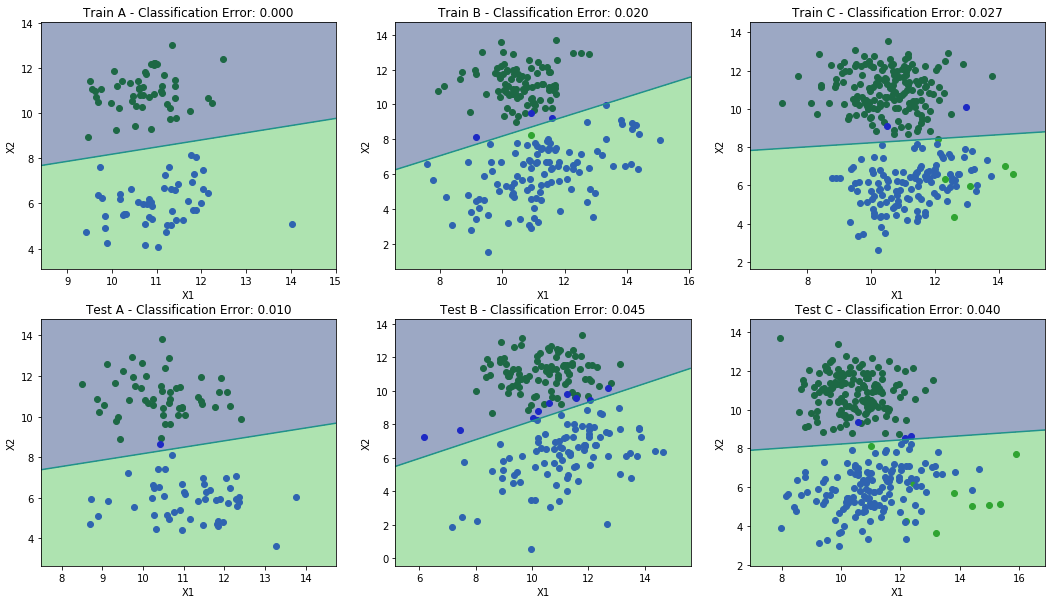

In [55]:
results(LDA())

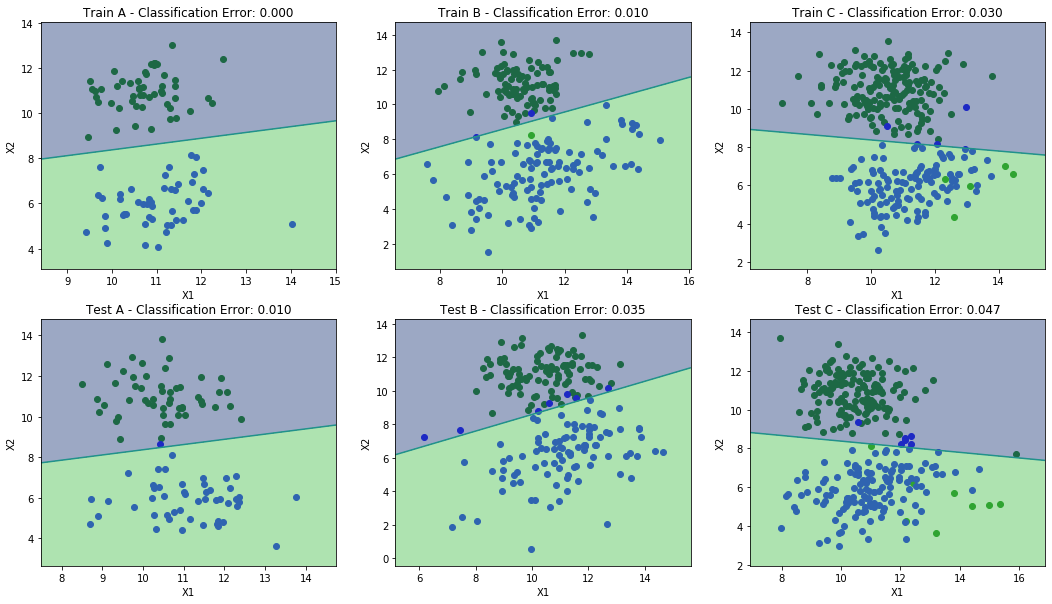

In [56]:
results(Logistic_Regression())

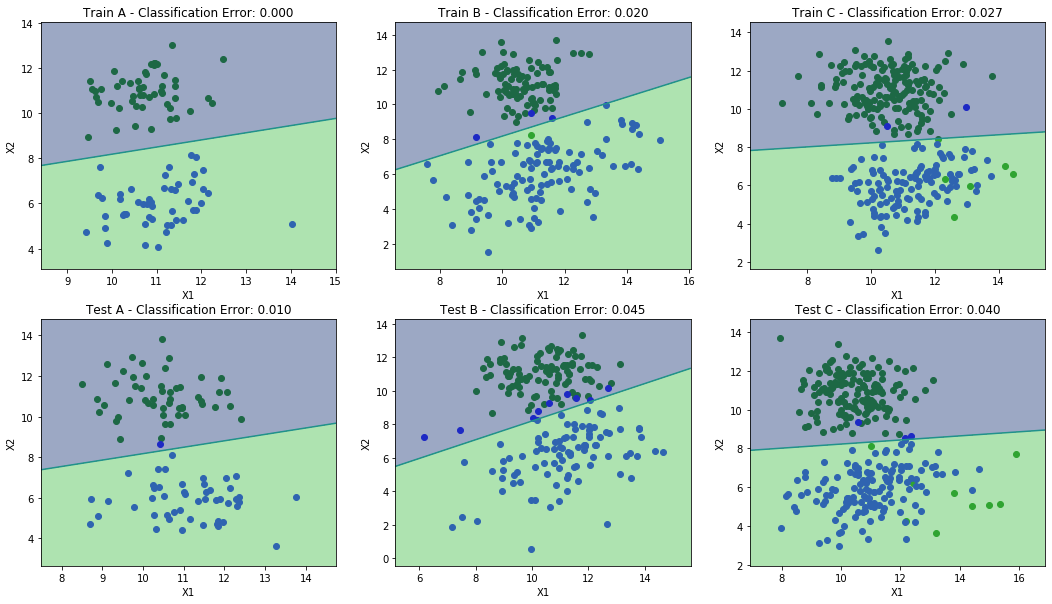

In [57]:
results(Linear_Regression())

### 5. QDA

In [58]:
class QDA():
    
    def __init__(self):
        self.A  = None
        self.b  = None
        self.c  = None
        self.pi = None
        self.mu = None
        self.sigma = None

    def fit(self, X, Y):
        
        n = X.shape[0]
        self.pi = np.mean(Y)
        self.mu = [np.sum((1-Y)*X, axis=0)/np.sum(1-Y), np.sum(Y*X, axis=0)/np.sum(Y)]
        sigma0 = np.dot(((1-Y)*(X-self.mu[0])).T, X-self.mu[0])
        sigma1 = np.dot((Y*(X-self.mu[1])).T, X-self.mu[1])
        self.sigma = [sigma0/np.sum(1-Y), sigma1/np.sum(Y)]
        
        A0, A1 = np.linalg.inv(self.sigma[0]), np.linalg.inv(self.sigma[1])
        self.A = (A0 - A1)/2
        self.b = np.dot(A1, self.mu[1]) - np.dot(A0, self.mu[0])
        self.c =-1/2*(np.dot(self.mu[1].T,np.dot(A1,self.mu[1]))-np.dot(self.mu[0].T,np.dot(A0,self.mu[0]))+np.log(self.pi/(1-self.pi)))+np.log(np.linalg.det(A1)/np.linalg.det(A0))/2
        
    def predict(self, X):
        
        p = sigmoid(np.diag(np.dot(X, np.dot(self.A,X.T))) + np.dot(X, self.b) + self.c)
        return np.where(p>= 0.5, 1, 0)

    def plot(self, X, Y, title='QDA'):    
        
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')

        Y = Y.reshape(-1)
        plt.scatter(X[Y==0,0], X[Y==0,1], c='g')
        plt.scatter(X[Y==1,0], X[Y==1,1], c='b')

        x, y = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100), np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
        z = np.hstack((x.reshape(x.shape[0]*x.shape[1],1), y.reshape(y.shape[0]*y.shape[1],1)))
        h = np.diag(np.dot(z, np.dot(self.A,z.T))) + np.dot(z, self.b) + self.c
        h = h.reshape(x.shape)
        plt.contour(x, y, h, 0)
        plt.contourf(x, y, h, 0, alpha = 0.5, cmap ='viridis')

In [59]:
qda_A = QDA()
qda_B = QDA()
qda_C = QDA()

qda_A.fit(XA_train, YA_train)
qda_B.fit(XB_train, YB_train)
qda_C.fit(XC_train, YC_train)

#print(qda_A.pi, qda_A.mu, qda_A.sigma)
#print(qda_B.pi, qda_B.mu, qda_B.sigma)
#print(qda_C.pi, qda_C.mu, qda_C.sigma)

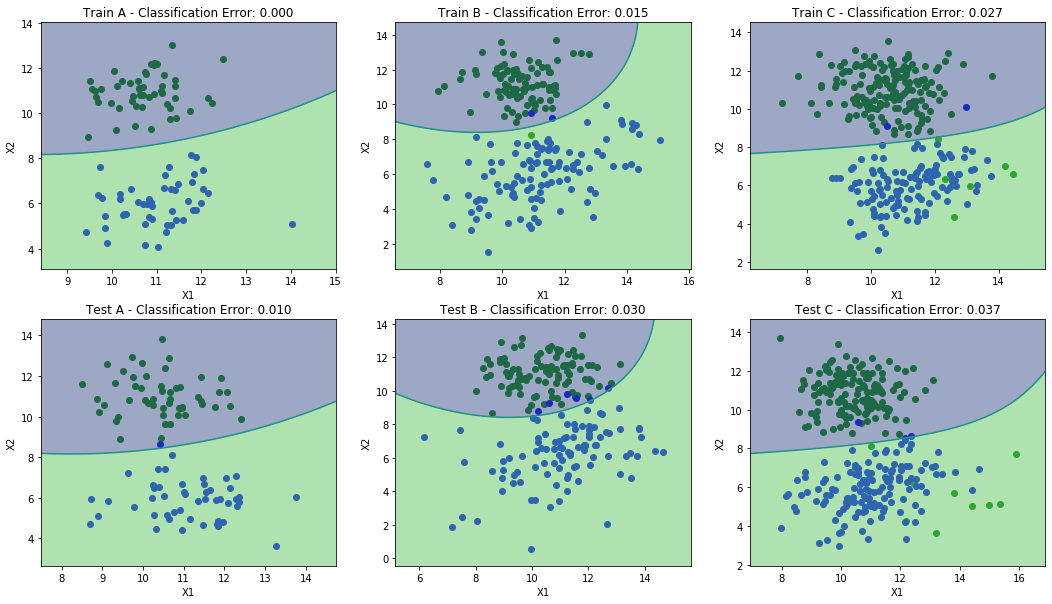

In [60]:
results(QDA())